In [1]:
import numpy as np
import pandas as pd
import LaviRot as lr
%matplotlib inline

In [4]:
steel_ex = lr.Material('steel_ex', E=200e9, Poisson=0.27, rho=7800)

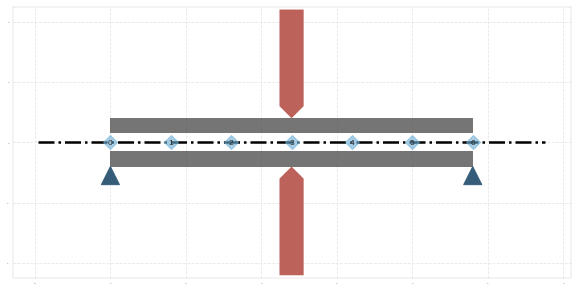

In [19]:
n_el = 6
L = 1.2 
s_id = 0.03
s_od = 0.08
speed = 315
shaft0 = lr.ShaftElement.section(L, n_el, s_id, s_od, steel_ex)

bearing0 = lr.BearingElement(0, kxx=1e18, cxx=0)
bearing1 = lr.BearingElement(n_el, kxx=1e18, cxx=0)
bearings = [bearing0, bearing1]

disk0 = lr.DiskElement(n=3, material=steel_ex, width=0.08, i_d=s_od, o_d=0.4)

rotor0 = lr.Rotor(shaft0, [disk0], bearings, speed)

lr.plot_rotor(rotor0)

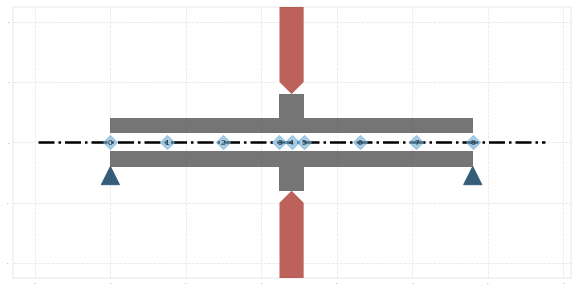

In [20]:
shaft1_0 = lr.ShaftElement.section(0.56, 3, s_id, s_od, steel_ex)
shaft1_1 = lr.ShaftElement.section(0.08, 2, s_id, s_od + 0.08, steel_ex)
shaft1_2 = lr.ShaftElement.section(0.56, 3, s_id, s_od, steel_ex)
shaft1 = [shaft1_0, shaft1_1, shaft1_2]

disk1_0 = lr.DiskElement(4, steel_ex, 0.08, 0.16, 0.4)
disks1 = [disk1_0]

bearing1_1 = lr.BearingElement(8, kxx=1e15, cxx=0)
bearings1 = [bearing0, bearing1_1]

rotor1 = lr.Rotor(shaft1, disks1, bearings1, speed)

lr.plot_rotor(rotor1)

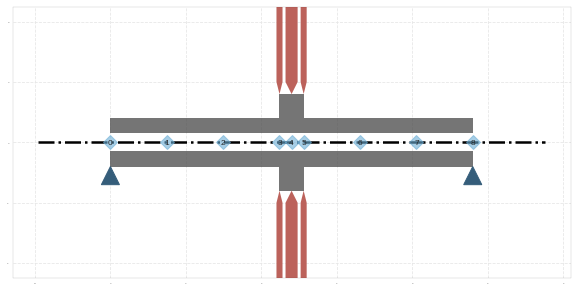

In [21]:
disk2_0 = lr.DiskElement(3, steel_ex, 0.02, 0.16, 0.4)
disk2_1 = lr.DiskElement(4, steel_ex, 0.04, 0.16, 0.4)
disk2_2 = lr.DiskElement(5, steel_ex, 0.02, 0.16, 0.4)
disks2 = [disk2_0, disk2_1, disk2_2]

rotor2 = lr.Rotor(shaft1, disks2, bearings1, speed)
lr.plot_rotor(rotor2)

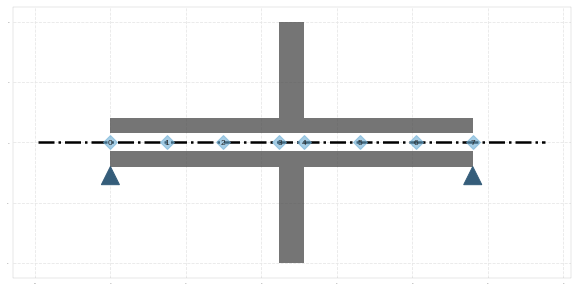

In [32]:
shaft3_1 = lr.ShaftElement(0.08, s_id, 0.4, steel_ex)
shaft3 = [shaft1_0, shaft3_1, shaft1_2]
bearing3_1 = lr.BearingElement(7, kxx=1e15, cxx=0)
bearings3 = [bearing0, bearing3_1]

rotor3 = lr.Rotor(shaft3, bearing_seal_elements=bearings3, w=speed)

lr.plot_rotor(rotor3)

In [33]:
pd.DataFrame(np.vstack([rotor0.wn, rotor1.wn, rotor2.wn, rotor3.wn]).T / (2*np.pi))

,0,1,2,3
0,53.638038,58.624023,58.635387,58.991590
1,53.701545,58.690531,58.702129,59.058361
2,261.593862,278.152071,276.770924,279.245543
3,326.430623,337.123156,334.525281,337.819971
4,736.614002,825.510359,826.797070,834.151701
5,737.899394,826.915697,828.265063,835.574539
